# Predicting Early Readmission in Diabetic Patients With Machine Learning

## Project Overview
This project analyzes ten years (1999–2008) of clinical care data from 130 US hospitals and integrated delivery networks. The dataset focuses on diabetic patients who received inpatient care—including lab work, medications, and short hospital stays (up to 14 days). The goal is to predict whether a patient will be readmitted within 30 days of discharge.

### Why This Matters
Think of it like this: If someone with diabetes goes to the hospital and is sent home too early or without the right care, they might get worse and have to come back. That’s bad for their health and expensive for everyone involved.

This research helps us figure out how to prevent that from happening in the first place.

Even though we know how to improve outcomes for diabetic patients, many still don’t receive proper care during their hospital stay. This project aims to highlight patterns in the data that can be used to flag high-risk patients before discharge—so hospitals can intervene early and reduce unnecessary readmissions.



## Objectives
1. Explore and clean real-world hospital data

2. Identify key features influencing early readmission

3. Train and evaluate machine learning models to predict readmission risk

4. Provide insights to help improve diabetic patient care and hospital efficiency

## Dataset
Source: UCI Machine Learning Repository - Diabetes 130-US hospitals dataset

Size: 100,000+ patient records

Features include demographics, lab tests, medications, diagnosis codes, length of stay, and discharge outcomes

The final model can help hospitals:

Identify patients at risk of early readmission

Improve discharge planning and follow-up care

Reduce healthcare costs and improve patient outcomes

## Chapter One: Obtaining Data For Analysis and Cleaning

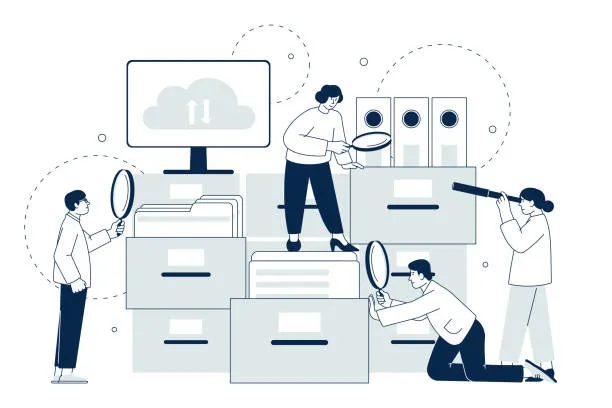

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [2]:
diabetes = pd.read_csv('diabetic_data.csv')
diabetes.shape

(101766, 50)

Let us check out the state of our dataset.

In [3]:
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
diabetes.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

The data could be having "?" as a place filler for null values.

In [5]:
diabetes.apply(lambda col: (col == '?').sum()).sort_values(ascending=False)


weight                      98569
medical_specialty           49949
payer_code                  40256
race                         2273
diag_3                       1423
diag_2                        358
diag_1                         21
num_procedures                  0
max_glu_serum                   0
number_diagnoses                0
number_inpatient                0
number_emergency                0
number_outpatient               0
num_medications                 0
readmitted                      0
num_lab_procedures              0
diabetesMed                     0
time_in_hospital                0
admission_source_id             0
discharge_disposition_id        0
admission_type_id               0
age                             0
gender                          0
patient_nbr                     0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
change                          0
metformin-piog

In [6]:
diabetes.replace('?', np.nan, inplace=True)

Let us check categorical columns with many unique values

In [7]:
for col in diabetes.columns:
    if diabetes[col].dtype == 'object':
        unique_vals = diabetes[col].nunique()
        if unique_vals < 20:
            print(f"{col}: {diabetes[col].unique()}")

race: ['Caucasian' 'AfricanAmerican' nan 'Other' 'Asian' 'Hispanic']
gender: ['Female' 'Male' 'Unknown/Invalid']
age: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight: [nan '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
payer_code: [nan 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
max_glu_serum: ['None' '>300' 'Norm' '>200']
A1Cresult: ['None' '>7' '>8' 'Norm']
metformin: ['No' 'Steady' 'Up' 'Down']
repaglinide: ['No' 'Up' 'Steady' 'Down']
nateglinide: ['No' 'Steady' 'Down' 'Up']
chlorpropamide: ['No' 'Steady' 'Down' 'Up']
glimepiride: ['No' 'Steady' 'Down' 'Up']
acetohexamide: ['No' 'Steady']
glipizide: ['No' 'Steady' 'Up' 'Down']
glyburide: ['No' 'Steady' 'Up' 'Down']
tolbutamide: ['No' 'Steady']
pioglitazone: ['No' 'Steady' 'Up' 'Down']
rosiglitazone: ['No' 'Steady' 'Up' 'Down']
acarbose: ['No' 'Steady' 'Up' 'Down']
miglitol: ['No' 

Since we will be looking at the readmitted coulumn, we can simplify it so that if Readmitted ="<30" we have a 1 if else we have a 0.(Yes or No)

In [8]:
# Binary target: 1 if readmitted within 30 days, else 0
diabetes['readmit_30'] = diabetes['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

In [9]:
diabetes.drop(['weight', 'payer_code', 'encounter_id', 'patient_nbr'], axis=1, inplace=True)

In [10]:
diabetes.duplicated().sum()

0

In [11]:
diabetes.isnull().sum()

race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone  

In [12]:
diabetes['medical_specialty'].fillna('Unknown', inplace=True)
diabetes['race'].fillna('Unknown', inplace=True)

In [13]:
diabetes.isnull().sum()

race                           0
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
medical_specialty              0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        21
diag_2                       358
diag_3                      1423
number_diagnoses               0
max_glu_serum                  0
A1Cresult                      0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitaz

In [14]:
diabetes["diag_2"].dtype

dtype('O')

In [15]:
diabetes['diag_1'].fillna('Missing', inplace=True)
diabetes['diag_2'].fillna('Missing', inplace=True)
diabetes['diag_3'].fillna('Missing', inplace=True)

## Chapter Two: Exploratory Data Analysis

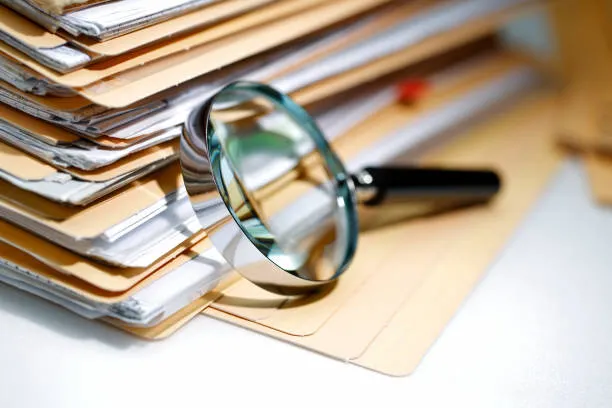

Here we will be trying to understand the structure of our data, discover patterns, relationships and outliers and generate insights and hypotheses before modelling.

#### 1. Target Variable Distribution:
Check for balance of readmissions.

Text(0.5, 1.0, 'Readmission Categories')

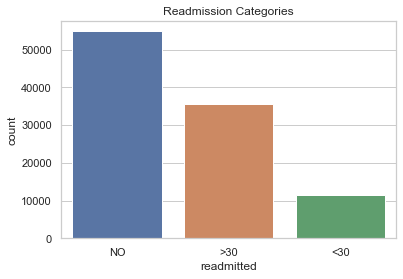

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualizing the distribution of readmission categories
sns.countplot(data=diabetes, x='readmitted')
plt.title('Readmission Categories')

Text(0.5, 1.0, 'Readmitted within 30 Days (0 = No, 1 = Yes)')

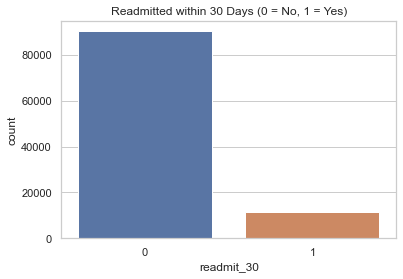

In [17]:
# Visualizing the binary target for readmission within 30 days
sns.countplot(data=diabetes, x='readmit_30')
plt.title('Readmitted within 30 Days (0 = No, 1 = Yes)')

The data for readmissions is not as balanced for the given dataset. Oversampling might come in hand later.

#### 2. Univariate Analysis

Let us look at key features individually.

<AxesSubplot:title={'center':'Race Distribution'}>

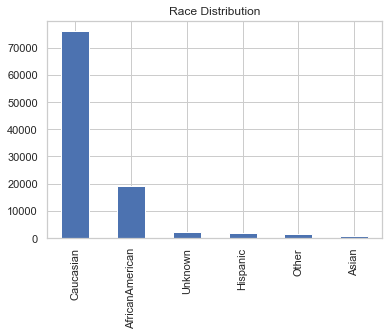

In [18]:
diabetes['race'].value_counts().plot(kind='bar', title='Race Distribution')

<AxesSubplot:title={'center':'Admission Types'}>

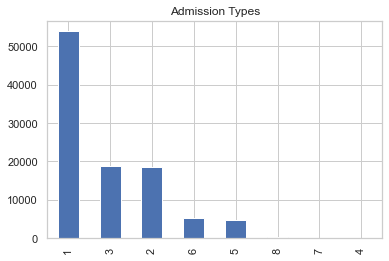

In [19]:
diabetes['admission_type_id'].value_counts().plot(kind='bar', title='Admission Types')

Text(0.5, 1.0, 'Number of Medications')

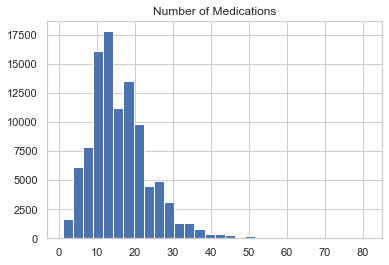

In [20]:
diabetes['num_medications'].hist(bins=30)
plt.title('Number of Medications')

Text(0.5, 1.0, 'Number of Lab Procedures')

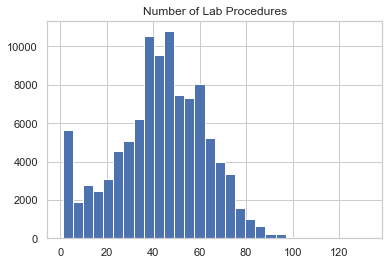

In [21]:
diabetes['num_lab_procedures'].hist(bins=30)
plt.title('Number of Lab Procedures')

#### 3. Bivariate analysis with target: 
Lets find out how features relate to the target('readmit_30')

Text(0.5, 1.0, 'Readmission by Gender')

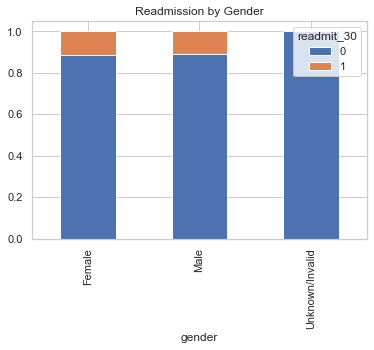

In [22]:
# Categorical features vs target
pd.crosstab(diabetes['gender'], diabetes['readmit_30'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Readmission by Gender')

<AxesSubplot:xlabel='readmit_30', ylabel='num_lab_procedures'>

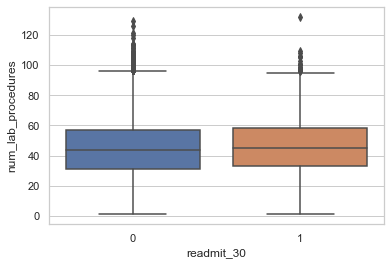

In [23]:
# Numeric features
sns.boxplot(data=diabetes, x='readmit_30', y='num_lab_procedures')

<AxesSubplot:>

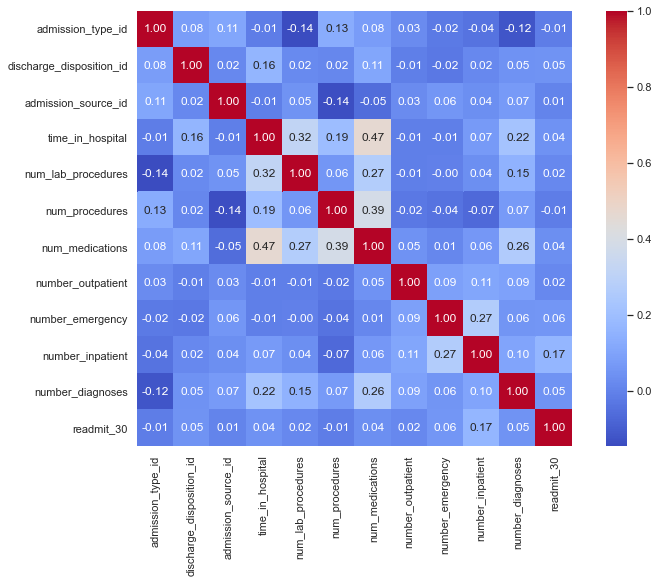

In [24]:
# Correlation matrix
corr_matrix = diabetes.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

#### Key Observations from the Heatmap
##### 1. Target Variable: readmit_30
Correlation with all features is very weak, ranging between -0.14 and +0.13.

This is expected for many healthcare problems—classification targets are often influenced by complex, nonlinear, and categorical factors, not just numerical ones.

##### 2. Strongest Correlates (Even if Weak)
🔹 number_inpatient vs readmit_30: ≈ 0.13
More inpatient visits → Slightly more chance of readmission.

Makes sense: repeat inpatient cases signal chronic or poorly managed conditions.

🔹 time_in_hospital: ≈ 0.13
Slight positive correlation: longer stays might reflect complications or unstable patients.

🔹 num_medications: ≈ 0.08
Slightly correlated: more meds might indicate complex treatment or comorbidities.

##### 3. Feature Redundancy
Some features correlate with each other:

num_medications vs num_lab_procedures: moderate positive correlation.

number_inpatient, number_outpatient, number_emergency: may reflect healthcare usage pattern.

#### Data Mapping 

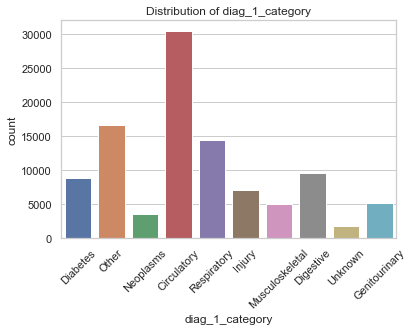

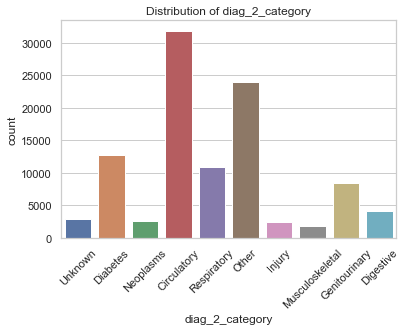

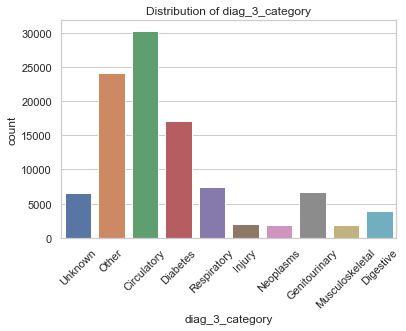

In [25]:
def categorize_diag(code):
    try:
        code = float(code)
        if (390 <= code <= 459) or code == 785:
            return 'Circulatory'
        elif (460 <= code <= 519) or code == 786:
            return 'Respiratory'
        elif (520 <= code <= 579) or code == 787:
            return 'Digestive'
        elif 250 <= code < 251:
            return 'Diabetes'
        elif (800 <= code <= 999):
            return 'Injury'
        elif (710 <= code <= 739):
            return 'Musculoskeletal'
        elif (580 <= code <= 629) or code == 788:
            return 'Genitourinary'
        elif (140 <= code <= 239):
            return 'Neoplasms'
        else:
            return 'Other'
    except:
        return 'Unknown'

for col in ['diag_1', 'diag_2', 'diag_3']:
    diabetes[col + '_category'] = diabetes[col].apply(categorize_diag)
# Visualizing the distribution of diagnosis categories
for col in ['diag_1_category', 'diag_2_category', 'diag_3_category']:
    sns.countplot(data=diabetes, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [26]:
numeric_cols = diabetes.select_dtypes(include='number')
# Calculate correlation with 'readmit_30'
correlation = numeric_cols.corr()['readmit_30'].sort_values(ascending=False)
print(correlation)

readmit_30                  1.000000
number_inpatient            0.165147
number_emergency            0.060747
discharge_disposition_id    0.050560
number_diagnoses            0.049524
time_in_hospital            0.044199
num_medications             0.038432
num_lab_procedures          0.020364
number_outpatient           0.018893
admission_source_id         0.005820
admission_type_id          -0.011651
num_procedures             -0.012227
Name: readmit_30, dtype: float64


## Chapter Three: Feature Engineering

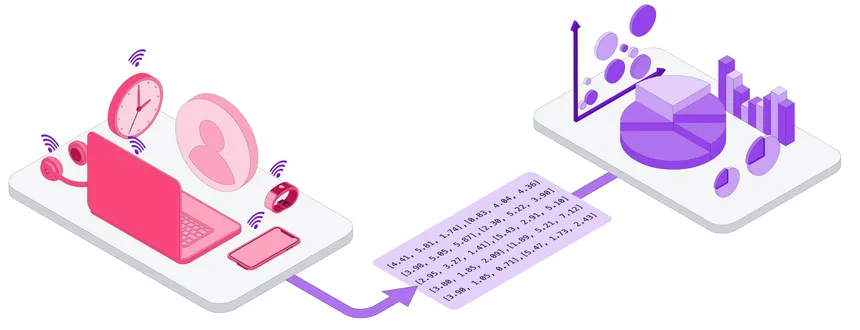


On this section well focus on both transformation and creation of new features.
The diagnosis codes were grouped in the section above. 

##### Flagging High-Risk Patient Patterns

In [27]:
diabetes['high_inpatient'] = (diabetes['number_inpatient'] > 1).astype(int)
diabetes['high_emergency'] = (diabetes['number_emergency'] > 1).astype(int)
diabetes['high_outpatient'] = (diabetes['number_outpatient'] > 3).astype(int)


#### Polypharmacy Indicator
This is an indicator for many medications

In [28]:
diabetes['polypharmacy'] = (diabetes['num_medications'] > 10).astype(int)
diabetes['high_lab_procedures'] = (diabetes['num_lab_procedures'] > 40).astype(int)
diabetes['high_procedures'] = (diabetes['num_procedures'] > 5).astype(int)

In [29]:
diabetes['hospital_stay_group'] = pd.cut(
    diabetes['time_in_hospital'],
    bins=[0, 3, 7, 14],
    labels=['Short', 'Medium', 'Long']
)
diabetes['readmit_30'] = diabetes['readmit_30'].astype(int)

We can count how many of the three diagnosis codes fall into "Diabetes" or "Circulatory" showing for chronic burden.

In [30]:
def is_chronic(cat):
    return cat in ['Diabetes', 'Circulatory']

diabetes['num_chronic_diag'] = (
    diabetes['diag_1_category'].apply(is_chronic).astype(int) +
    diabetes['diag_2_category'].apply(is_chronic).astype(int) +
    diabetes['diag_3_category'].apply(is_chronic).astype(int)
)

<AxesSubplot:xlabel='num_chronic_diag', ylabel='count'>

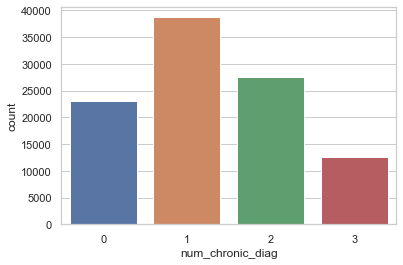

In [31]:
# Visualizing the number of chronic diagnoses
sns.countplot(data=diabetes, x='num_chronic_diag')  

### Encodding

In [32]:
diabetes["admission_type_id"]

0         6
1         1
2         1
3         1
4         1
         ..
101761    1
101762    1
101763    1
101764    2
101765    1
Name: admission_type_id, Length: 101766, dtype: int64

Using the mapping for admission types, let's map the numeric IDs to readable labels.

In [33]:

from sklearn.preprocessing import LabelEncoder
# Map Age Ranges
age_map = {
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35,
    '[40-50)': 45, '[50-60)': 55, '[60-70)': 65, '[70-80)': 75,
    '[80-90)': 85, '[90-100)': 95
}
diabetes['age'] = diabetes['age'].map(age_map)

# Drop Unnecessary Columns
diabetes.drop(columns=['weight', 'payer_code', 'encounter_id', 'patient_nbr'], inplace=True, errors='ignore')

# Ensure admission_type and hospital_stay_group exist 
admission_type_map = {
    1: 'Emergency', 2: 'Urgent', 3: 'Elective', 4: 'Newborn',
    5: 'Not Available', 6: 'NULL', 7: 'Trauma Center', 8: 'Not Mapped'
}
diabetes['admission_type'] = diabetes['admission_type_id'].map(admission_type_map)

diabetes['hospital_stay_group'] = pd.cut(
    diabetes['time_in_hospital'],
    bins=[0, 3, 7, 14],
    labels=['Short', 'Medium', 'Long']
)

# One-Hot Encode
one_hot_cols = [
    'gender', 'race', 'admission_type', 'hospital_stay_group',
    'diag_1_category', 'diag_2_category', 'diag_3_category',
    'max_glu_serum', 'A1Cresult'
]

diabetes = pd.get_dummies(diabetes, columns=one_hot_cols, drop_first=True)

# Label Encode 
label_cols = ['medical_specialty', 'discharge_disposition_id', 'admission_source_id']
le = LabelEncoder()
for col in label_cols:
    diabetes[col] = le.fit_transform(diabetes[col].astype(str))

# Confirm all numeric
print("Remaining non-numeric columns:", diabetes.select_dtypes(include='object').columns.tolist())


Remaining non-numeric columns: ['diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


In [34]:
def map_diag(code):
    try:
        code = float(code)
    except:
        return 'Unknown'

    if (390 <= code <= 459) or (code == 785):
        return 'Circulatory'
    elif (460 <= code <= 519) or (code == 786):
        return 'Respiratory'
    elif (520 <= code <= 579) or (code == 787):
        return 'Digestive'
    elif (250.0 <= code < 251.0):
        return 'Diabetes'
    elif (800 <= code <= 999):
        return 'Injury'
    elif (710 <= code <= 739):
        return 'Musculoskeletal'
    elif (580 <= code <= 629) or (code == 788):
        return 'Genitourinary'
    elif (140 <= code <= 239):
        return 'Neoplasms'
    else:
        return 'Other'


In [35]:
# Create new categorical columns
diabetes['diag_1_category'] = diabetes['diag_1'].apply(map_diag)
diabetes['diag_2_category'] = diabetes['diag_2'].apply(map_diag)
diabetes['diag_3_category'] = diabetes['diag_3'].apply(map_diag)

# Drop original diagnosis columns
diabetes.drop(columns=['diag_1', 'diag_2', 'diag_3'], inplace=True)


In [36]:
diabetes = pd.get_dummies(
    diabetes, 
    columns=['diag_1_category', 'diag_2_category', 'diag_3_category'], 
    drop_first=True
)


In [37]:
#Mapping of medicine features
med_map = {"No": 0, "Down": 1, "Steady": 2, "Up": 3}


In [38]:
med_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin', 'glyburide-metformin',
    'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone'
]

for col in med_cols:
    diabetes[col] = diabetes[col].map(med_map)
# Check for any remaining non-numeric columns
print("Remaining non-numeric columns:", diabetes.select_dtypes(include='object').columns.tolist())

Remaining non-numeric columns: ['change', 'diabetesMed', 'readmitted']


In [39]:
diabetes['change'] = diabetes['change'].map({'No': 0, 'Ch': 1})
diabetes['diabetesMed'] = diabetes['diabetesMed'].map({'No': 0, 'Yes': 1})


In [40]:
diabetes.drop('readmitted', axis=1, inplace=True)

In [41]:
for col in diabetes.columns:
    print(col)

age
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
medical_specialty
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
number_diagnoses
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
readmit_30
high_inpatient
high_emergency
high_outpatient
polypharmacy
high_lab_procedures
high_procedures
num_chronic_diag
gender_Male
gender_Unknown/Invalid
race_Asian
race_Caucasian
race_Hispanic
race_Other
race_Unknown
admission_type_Emergency
admission_type_NULL
admission_type_Newborn
admission_type_Not Available
admission_type_Not Mapped
admission_type_Trauma Center
admission_type_Urgent
hospital_stay_group_Medium
hospital_stay_group_L

### Solving Class Imbalance

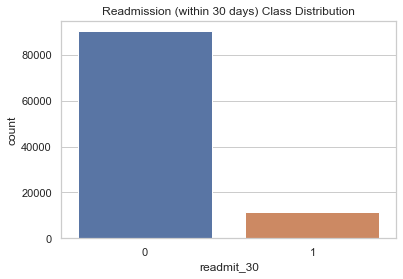

0    0.888401
1    0.111599
Name: readmit_30, dtype: float64


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=diabetes, x='readmit_30')
plt.title('Readmission (within 30 days) Class Distribution')
plt.show()

print(diabetes['readmit_30'].value_counts(normalize=True))


## Chapter Four: Generating Learning Models

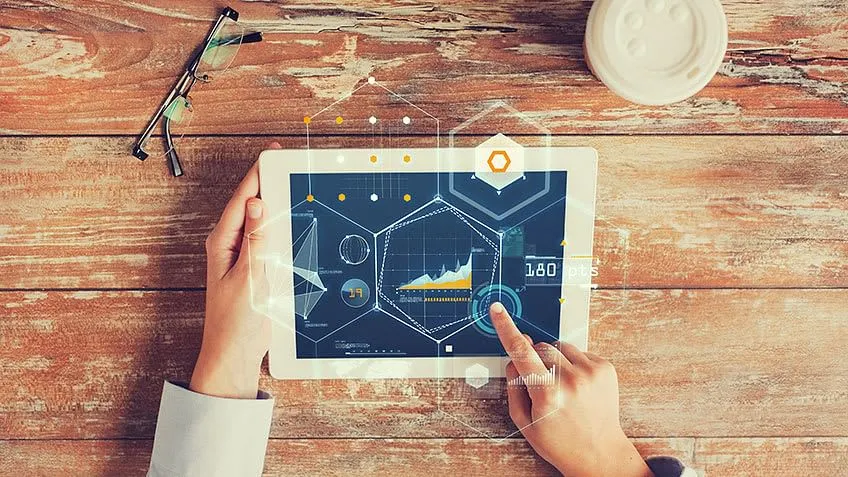

### Train-test split

In [45]:
X = diabetes.drop(['readmit_30'], axis=1)
y = diabetes['readmit_30']

In [46]:
from sklearn.model_selection import train_test_split
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
X_train_array = X_train.values
y_train_array = y_train.values

In [54]:
non_numeric_cols = X_train.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: []


In [55]:
print("y_train dtype:", y_train.dtype)
print("Unique values in y_train:", y_train.unique())

y_train dtype: int32
Unique values in y_train: [0 1]


In [56]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

In [63]:
# Drop non-numeric columns from X_train if any remain
X_train_clean = X_train.select_dtypes(include=['int64', 'float64'])

# Ensure y_train is a clean Series of integers
y_train_clean = y_train.astype(int)

# Reset indices to avoid mismatch
X_train_clean = X_train_clean.reset_index(drop=True)
y_train_clean = y_train_clean.reset_index(drop=True)

# Clean X_test
X_test_clean = X_test.select_dtypes(include=['int64', 'float64']).reset_index(drop=True)

# Apply oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_clean, y_train_clean)


In [64]:
print("X_train_clean dtypes:\n", X_train_clean.dtypes.value_counts())
print("y_train_clean unique:\n", y_train_clean.unique())


X_train_clean dtypes:
 int64    35
dtype: int64
y_train_clean unique:
 [0 1]


### Standardization of Learning Sets

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_ros)
X_test_scaled = scaler.transform(X_test_clean)


### Model Creation

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize models
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
dtree = DecisionTreeClassifier(class_weight='balanced', random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)


In [71]:
logreg.fit(X_train_scaled, y_train_ros)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [72]:
dtree.fit(X_train_scaled, y_train_ros)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [73]:
rf.fit(X_train_scaled, y_train_ros)

RandomForestClassifier(class_weight='balanced', random_state=42)

### Comprehensive Model Evaluation

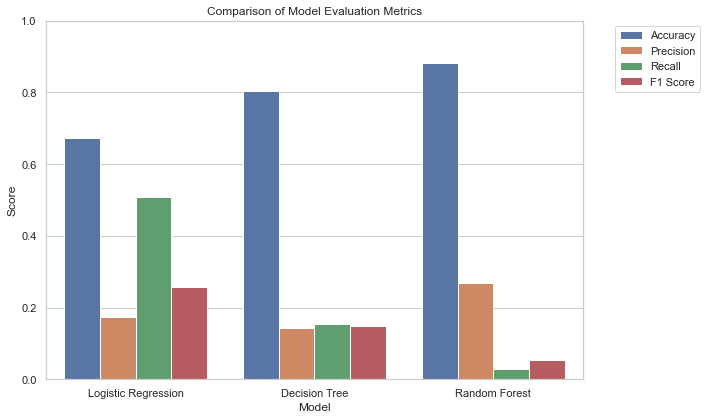

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure predictions are made on scaled test data
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_dtree = dtree.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

# Collect metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_dtree),
    accuracy_score(y_test, y_pred_rf)
]
precision = [
    precision_score(y_test, y_pred_logreg),
    precision_score(y_test, y_pred_dtree),
    precision_score(y_test, y_pred_rf)
]
recall = [
    recall_score(y_test, y_pred_logreg),
    recall_score(y_test, y_pred_dtree),
    recall_score(y_test, y_pred_rf)
]
f1 = [
    f1_score(y_test, y_pred_logreg),
    f1_score(y_test, y_pred_dtree),
    f1_score(y_test, y_pred_rf)
]

# Create a DataFrame for plotting
import pandas as pd

results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
})

# Melt DataFrame for seaborn
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')
plt.title('Comparison of Model Evaluation Metrics')
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Random Forest scores best as compared to other models showing it is reliable to generate better insights on the given data

### Confusion Matrices for Each Model

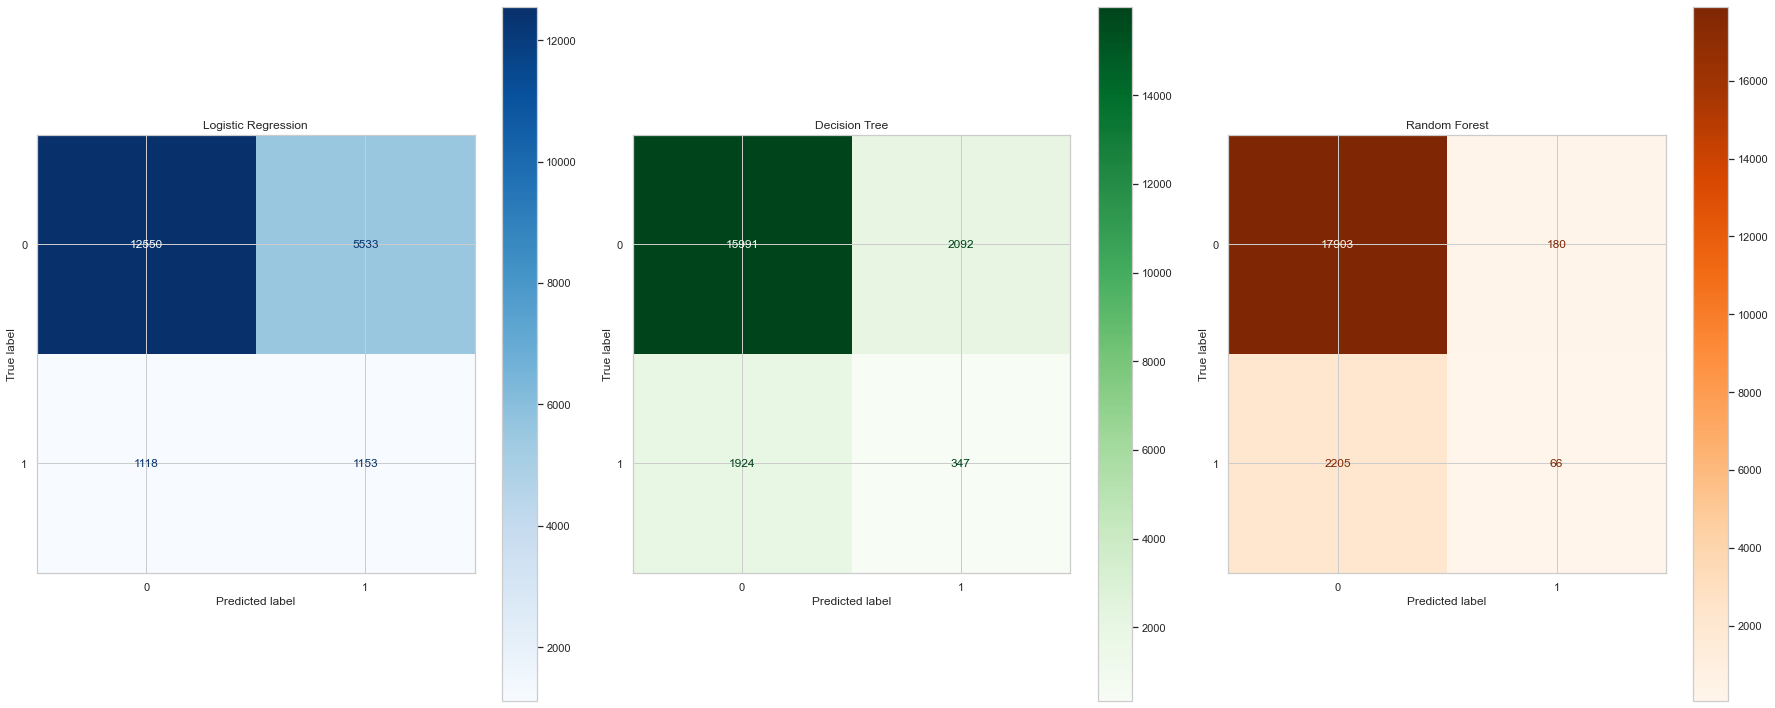

In [77]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predictions
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_dtree = dtree.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

fig, axes = plt.subplots(1, 3, figsize=(25, 10))

# Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=logreg.classes_)
disp_logreg.plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression")

# Decision Tree
cm_dtree = confusion_matrix(y_test, y_pred_dtree)
disp_dtree = ConfusionMatrixDisplay(confusion_matrix=cm_dtree, display_labels=dtree.classes_)
disp_dtree.plot(ax=axes[1], cmap='Greens')
axes[1].set_title("Decision Tree")

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp_rf.plot(ax=axes[2], cmap='Oranges')
axes[2].set_title("Random Forest")

# Fix layout
plt.tight_layout()
plt.show()


### ROC and AUC Scores for All Models

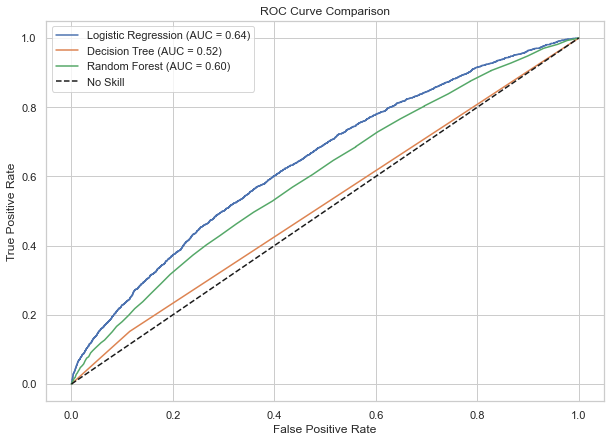

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities
y_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
y_proba_dtree = dtree.predict_proba(X_test_scaled)[:, 1]
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, y_proba_dtree)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

auc_logreg = roc_auc_score(y_test, y_proba_logreg)
auc_dtree = roc_auc_score(y_test, y_proba_dtree)
auc_rf = roc_auc_score(y_test, y_proba_rf)

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_dtree, tpr_dtree, label=f'Decision Tree (AUC = {auc_dtree:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


We can see the Decision Tree Model based on the AUC Score is boaderline guessing. We can assume it and focus on the other two models.

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[17903   180]
 [ 2205    66]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     18083
           1       0.27      0.03      0.05      2271

    accuracy                           0.88     20354
   macro avg       0.58      0.51      0.49     20354
weighted avg       0.82      0.88      0.84     20354



### Hyperparameter Tuning

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid_lr = GridSearchCV(logreg, param_grid_lr, cv=5, scoring='f1', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train_ros)

print("Best Logistic Regression Params:", grid_lr.best_params_)
best_logreg = grid_lr.best_estimator_


Best Logistic Regression Params: {'C': 0.01, 'solver': 'saga'}


In [81]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='f1', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train_ros)

print("Best Random Forest Params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_


Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [88]:
best_logreg.fit(X_train_scaled, y_train_ros) 
best_rf.fit(X_train_scaled, y_train_ros)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [89]:
from sklearn.metrics import classification_report, roc_auc_score

# Logistic Regression
y_pred_lr = best_logreg.predict(X_test_scaled)
y_proba_lr = best_logreg.predict_proba(X_test_scaled)[:, 1]
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("AUC:", roc_auc_score(y_test, y_proba_lr))

# Random Forest
y_pred_rf = best_rf.predict(X_test_scaled)
y_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("AUC:", roc_auc_score(y_test, y_proba_rf))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79     18083
           1       0.17      0.51      0.26      2271

    accuracy                           0.67     20354
   macro avg       0.55      0.60      0.52     20354
weighted avg       0.83      0.67      0.73     20354

AUC: 0.643187853903181
Random Forest Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     18083
           1       0.27      0.03      0.05      2271

    accuracy                           0.88     20354
   macro avg       0.58      0.51      0.49     20354
weighted avg       0.82      0.88      0.84     20354

AUC: 0.6024929861919303


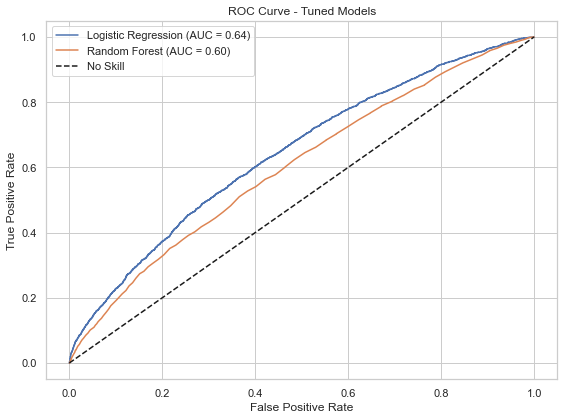

In [90]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_proba_lr):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


No major changes after hyperparameter tuning. Shows need for more advanced classification models.

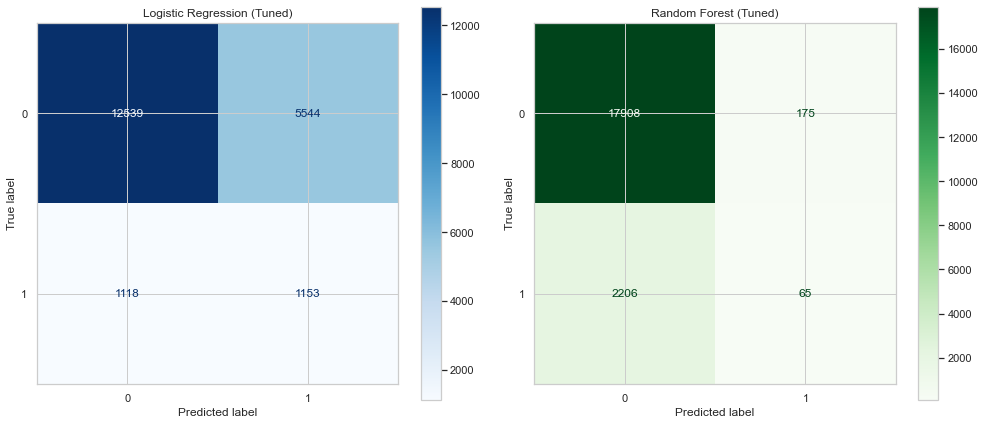

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=best_logreg.classes_)
disp_lr.plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Logistic Regression (Tuned)")

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf.classes_)
disp_rf.plot(ax=axes[1], cmap='Greens')
axes[1].set_title("Random Forest (Tuned)")

plt.tight_layout()
plt.show()


## Chapter Five: Model Interpretation

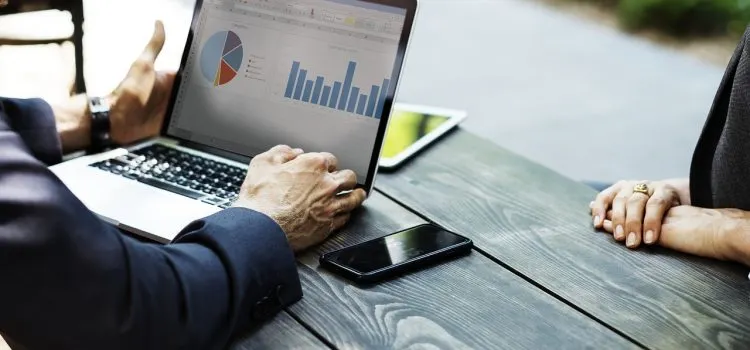

In [93]:
# Logistic Regression Feature Coefficients
feature_names = X_train_clean.columns
coefficients = best_logreg.coef_[0]

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df['AbsCoeff'] = coef_df['Coefficient'].abs()
coef_df.sort_values('AbsCoeff', ascending=False).head(10)


,Feature,Coefficient,AbsCoeff
8,number_inpatient,0.470783,0.470783
34,diabetesMed,0.099788,0.099788
2,time_in_hospital,0.089123,0.089123
0,age,0.080476,0.080476
7,number_emergency,0.070109,0.070109
9,number_diagnoses,0.070089,0.070089
10,metformin,-0.068862,0.068862
5,num_medications,0.057630,0.057630
4,num_procedures,-0.048610,0.048610
14,glimepiride,-0.042354,0.042354


In [95]:
# Random Forest Feature Importance
importances = best_rf.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
rf_importance_df.sort_values('Importance', ascending=False).head(10)

,Feature,Importance
3,num_lab_procedures,0.195492
5,num_medications,0.159314
2,time_in_hospital,0.099680
0,age,0.085946
4,num_procedures,0.071172
9,number_diagnoses,0.068638
8,number_inpatient,0.063725
1,admission_type_id,0.055230
27,insulin,0.033132
6,number_outpatient,0.031452


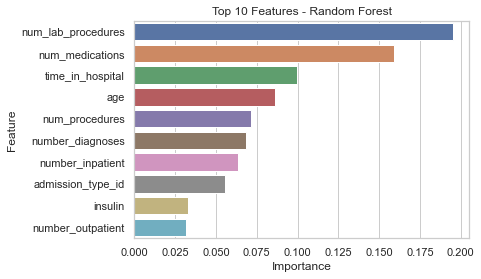

In [96]:
sns.barplot(data=rf_importance_df.sort_values('Importance', ascending=False).head(10),
            x='Importance', y='Feature')
plt.title('Top 10 Features - Random Forest')
plt.show()


### Top Factors That Increase Readmission Risk
##### num_lab_procedures

Interpretation: More lab procedures may indicate more severe or uncertain conditions, prompting closer monitoring or follow-up.

Implication: Patients with many lab tests could be flagged as higher risk — hospitals might set discharge flags or post-discharge monitoring.

##### num_medications

Interpretation: Polypharmacy increases complexity and may lead to side effects, non-adherence, or drug interactions.

Implication: Patients on many medications might need pharmacist counseling or med reconciliation at discharge.

##### time_in_hospital

Interpretation: Longer stays can reflect greater illness severity or complications, which may elevate readmission risk.

Implication: Consider post-discharge support or transitional care plans for long-stay patients.

##### age

Interpretation: Older adults generally face higher risk due to comorbidities and frailty.

Implication: Stratify older patients for enhanced discharge planning, including caregiver coordination or home visits.

##### num_procedures

Interpretation: Multiple procedures may signal complex care needs or surgical interventions.

Implication: Ensure follow-ups are scheduled and that patients understand recovery steps.

##### number_diagnoses

Interpretation: More diagnoses typically indicate multiple chronic conditions.

Implication: Flag these patients for case management or coordination with primary care.

###### number_inpatient

Interpretation: Prior inpatient visits could suggest instability or frequent exacerbations.

Implication: These patients are prime candidates for chronic disease programs or remote monitoring.

##### admission_type_id

Interpretation: Emergency vs elective admission can influence readmission likelihood. Emergency cases often reflect uncontrolled issues.

Implication: Emergency admissions should trigger care continuity protocols on discharge.

##### insulin

Interpretation: Insulin use often indicates advanced diabetes or poor glycemic control.

Implication: Insulin-dependent patients may benefit from diabetes educators or virtual glucose monitoring.

##### number_outpatient

Interpretation: Outpatient visits may indicate proactive care or, conversely, poorly controlled conditions.

Implication: Consider reviewing outpatient care patterns — are these visits preventing admission, or signaling instability?

##### Individual Risk Scores

In [97]:
y_proba_rf = rf.predict_proba(X_test_scaled)[:, 1]
patient_risk_df = X_test.copy()
patient_risk_df['Actual_Readmit'] = y_test.values
patient_risk_df['Predicted_Probability'] = y_proba_rf

# Sort patients by highest risk
patient_risk_df_sorted = patient_risk_df.sort_values(by='Predicted_Probability', ascending=False)

# Show top 10 highest-risk patients
patient_risk_df_sorted.head(10)


,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,high_inpatient,high_emergency,high_outpatient,polypharmacy,high_lab_procedures,high_procedures,num_chronic_diag,gender_Male,gender_Unknown/Invalid,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_Unknown,admission_type_Emergency,admission_type_NULL,admission_type_Newborn,admission_type_Not Available,admission_type_Not Mapped,admission_type_Trauma Center,admission_type_Urgent,hospital_stay_group_Medium,hospital_stay_group_Long,diag_1_category_Diabetes,diag_1_category_Digestive,diag_1_category_Genitourinary,diag_1_category_Injury,diag_1_category_Musculoskeletal,diag_1_category_Neoplasms,diag_1_category_Other,diag_1_category_Respiratory,diag_1_category_Unknown,diag_2_category_Diabetes,diag_2_category_Digestive,diag_2_category_Genitourinary,diag_2_category_Injury,diag_2_category_Musculoskeletal,diag_2_category_Neoplasms,diag_2_category_Other,diag_2_category_Respiratory,diag_2_category_Unknown,diag_3_category_Diabetes,diag_3_category_Digestive,diag_3_category_Genitourinary,diag_3_category_Injury,diag_3_category_Musculoskeletal,diag_3_category_Neoplasms,diag_3_category_Other,diag_3_category_Respiratory,diag_3_category_Unknown,max_glu_serum_>300,max_glu_serum_None,max_glu_serum_Norm,A1Cresult_>8,A1Cresult_None,A1Cresult_Norm,diag_1_category_Diabetes,diag_1_category_Digestive,diag_1_category_Genitourinary,diag_1_category_Injury,diag_1_category_Musculoskeletal,diag_1_category_Neoplasms,diag_1_category_Other,diag_1_category_Respiratory,diag_1_category_Unknown,diag_2_category_Diabetes,diag_2_category_Digestive,diag_2_category_Genitourinary,diag_2_category_Injury,diag_2_category_Musculoskeletal,diag_2_category_Neoplasms,diag_2_category_Other,diag_2_category_Respiratory,diag_2_category_Unknown,diag_3_category_Diabetes,diag_3_category_Digestive,diag_3_category_Genitourinary,diag_3_category_Injury,diag_3_category_Musculoskeletal,diag_3_category_Neoplasms,diag_3_category_Other,diag_3_category_Respiratory,diag_3_category_Unknown,Actual_Readmit,Predicted_Probability
7348,5,1,0,14,3,37,47,0,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1.00
39229,85,1,0,14,3,18,54,0,14,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.00
96046,85,1,0,14,3,71,64,0,10,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,1,0,0,0,0,1,0,2,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.89
99435,85,1,0,14,2,71,31,0,8,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.86
21542,55,1,0,14,2,8,48,3,18,0,0,2,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,1,1,0,2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.86
83769,85,1,20,14,2,71,29,0,8,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [98]:
patient_risk_df_sorted.to_csv('patient_readmission_risks.csv', index=False)


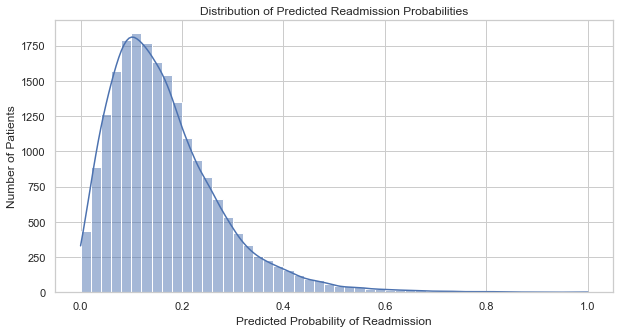

In [99]:
# Risk Score Distribution
plt.figure(figsize=(10, 5))
sns.histplot(patient_risk_df['Predicted_Probability'], bins=50, kde=True)
plt.title("Distribution of Predicted Readmission Probabilities")
plt.xlabel("Predicted Probability of Readmission")
plt.ylabel("Number of Patients")
plt.show()


## Conclusion

### Top Risk Factors for Readmission:

##### Most influential:
num_lab_procedures, num_medications, and time_in_hospital

These factors likely reflect patient complexity and care intensity

#### Performance Summary:

Random Forest model used for risk prediction

Model achieves moderate performance *(AUC ~0.64)*

Prioritizes recall to identify more at-risk patients

#### Opportunities for Intervention:

Patients with frequent lab procedures or high medication counts might benefit from enhanced discharge planning or early follow-ups

Risk models can triage resources, e.g. post-discharge calls or case management

